<div align=center><img src="https://logosdownload.com/logo/national-university-of-singapore--logo-big.png" width="30%" height="50%"></div>


<center> <font face="Time new roman" size = 7 align=center>EE5703 Assignment</font> </center>
<center> <font face="Time new roman" size = 5 align=center>Steady State Model for Doubly Fed Induction Generator</font> </center>


<font face="Time new roman" size = 4>

1. The task for the Assigment is to model a Doubly Fed Induction Generator operating in steady state for a Wind Turbine Application. 

2. Develop the model for steady state from the space vector based equations. Assume that there is a rotor voltage space vector available. 

3. Find the expressions for the stator electrical power and rotor electrical power. 

4. The rotor voltage space vector can be controlled to have a magnitude from 0 to 1 p.u. and any angle

5. What would be the rotor current if the power delivered to the grid is -0.5 p.u ? 

6. Draw the curve of rotor current magnitude when the slip is varied between pull-out slip to zero slip
7. What is the power factor at the stator and the power factor at rotor end connected to grid (assuming only sinusoidal quantities)? 
[An AC/DC converter connected to grid feeds a DC link, a DC to AC converter is connected to DC bus. The AC end of DC to AC converter is connected to the rotor terminals to provide $\vec
{v}_r$]
8. Draw the curve of rotor power as the slip changes
9. *Bonus Points* Draw the curve for change in rotor current and rotor power if the rotor voltage magnitude is changes with respect to stator voltage (which is fixed at grid voltage) 


Use the following normalized parameters of the motor 

<font face="Time new roman" size = 4>
Submission

1. Please submit the assignment in canvas folder by the **end of the week13 (Sunday 19 Nov 2023)**
2. *Please rename the file as your  MatriNo_Name_Assn1**
3. You may submit the jupyter notebook format or you can submit as pdf
4. To generate pdf, in jupyter notebook go to File> Download as> and choose the format (.ipynb or .pdf)

For more information on how to use Markdown cells in jupyter notebook (https://jupyter-notebook.readthedocs.io/en/stable/notebook.html), please refer to 
https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html

#  <font face="Time new roman" size = 6>1. Steady State model of Doubly fed IM


\begin{align}
\vec{v}_s & = r_s\vec{i}_s + j\omega_sl_s\vec{i}_s + j\omega_sl_h\vec{i}_r\\
\vec{v}_r &= r_r\vec{i}_r + js\omega_sl_r\vec{i}_r + js\omega_sl_h\vec{i}_s\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r + j\omega_sl_h\vec{i}_s
\end{align}
Neglecting the drop in stator resistance we can get 
\begin{align}
\vec{v}_s & = j\omega_sl_s\vec{i}_s + j\omega_sl_h\vec{i}_r\\
\vec{i}_s & = - \frac{l_h}{l_s}\vec{i}_r + \frac{1}{j\omega_sl_s}\vec{v}_s\\
\end{align}
Substiuting in rotor equation, we get
\begin{align}
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r + j\omega_sl_h\vec{i}_s\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r + j\omega_sl_h\left[ - \frac{l_h}{l_s}\vec{i}_r + \frac{1}{j\omega_sl_s}\vec{v}_s \right]\\
\frac{\vec{v}_r}{s} &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r - j\omega_s\frac{l^{2}_{h}}{l_s}\vec{i}_r + \frac{l_h}{l_s}\vec{v}_s\\
\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s &= \frac{r_r}{s}\vec{i}_r + j\omega_sl_r\vec{i}_r\left(1 - j\omega_s\frac{l^{2}_{h}}{l_rl_s}\right) \\
\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s &= \frac{r_r}{s}\vec{i}_r + j\omega_s\sigma l_r\vec{i}_r\\
\vec{i}_r & = \frac{\frac{\vec{v}_r}{s}-\frac{l_h}{l_s}\vec{v}_s}{\frac{r_r}{s} + j\omega_s\sigma l_r}\\
\sigma &= 1 - \frac{l^{2}_{h}}{l_rl_s}
\end{align}




#### Stator power 
is given by 
\begin{align}
p_s &= \Re\{\vec{v}^{*}_s\cdot\vec{i}_s\} 
\end{align}

Power given to air gap will be based on active power consumed on rotor side 
\begin{align}
p_{ag} &= \Re\left[\frac{l_h}{l_s}\vec{v}^{*}_s \cdot \vec{i}_r\right]  \notag \\
\end{align}
$$K_r = \frac{l_h}{l_s}$$

Active power at rotor terminals 
\begin{align}
p_r &= \Re\left[\vec{v}^{*}_r\cdot\vec{i}_r \right]
\end{align}




# <font face="Time new roman" size = 6>2. Introduction

<font face="Time new roman" size = 4> 
In the realm of renewable energy, the Doubly Fed Induction Motor (DFIM) stands as a crucial player in converting wind energy into electrical power. With a primary focus on stability and efficiency, this research delves into a comprehensive analysis of factors influencing power generation in DFIM. Specifically, my attention is directed towards understanding the impact of how to make the system stable and efficient. 

Through a series of simulations and tests, this study seeks to unravel the complexities of DFIM behavior, aiming to identify optimal configurations that balance stability and efficiency under various conditions. The outcomes of this research have the potential to inform advancements in DFIM applications, contributing to the broader goal of enhancing sustainable energy solutions.

So, we have two main goals for DFIM:
1. Make sure the system stable and will not affect the grid seriously.
2. Try to make the generator work at high efficiency.
There are many ways to optimize the system. In this assignment I focus on slip, rotor current and rotor voltage to achieve these goals.


# <font face="Time new roman" size = 6>3. Simulation

In [685]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
from math import pi,cos,sin,tan
import handcalcs.render
import cmath
import matplotlib.ticker as tck

##  <font face="Time new roman" size = 5> 3.1 Power, slip and current analysis

In [686]:
mach_ma = {"rs": 0.015, "rr": 0.04, "lh": 2.31, "ls": 2.35, "lr": 2.35, "tmech":596.9}

In [687]:
def mach_Tpara(dict):  # calculate the parameters
    rs = dict["rs"]
    rr = dict["rr"]
    lh = dict["lh"]
    ls = dict["ls"]
    lr = dict["lr"]
    sig= 1-(lh*lh)/(lr*ls)
    kr=lh/lr
    sigs= ls- lh
    sigr = lr - lh
    lsigss = sigs*lh
    lsigrr = sigr*lh
    return rs,rr,lh,ls,lr,sig,lsigss,lsigrr

In [688]:
def plot_cvector(C):   # used to plot the vector, start from (0,0) to (x,y)
    xe = C.real
    ye = C.imag
    x0 = 0.0
    y0 = 0.0
    return [x0,y0,xe,ye]

In [689]:
def ss_DFIG(mach_dict, s, vr, vrang):
    rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_dict) #get parameters
    ws = 1.0                                 # angular velocity
    sp = rr/(ws*(lsigss + lsigrr))
    sx = s                                   # slip
    vs = complex(0, 1.0)                     # stator voltage
    vrbysx = cmath.rect(sx*(lh/ls),vrang)/sx
    zr = complex(rr/sx, ws*sig*lr)           # resistance 
    ir1 = (vrbysx - vs*lh/ls)/zr             # rotor current
    is1 = vs/complex(0, ws*ls) - lh*ir1/ls   # stator current
    Ss = vs*np.conj(is1)                     # The power of stator
    Ps = Ss.real                             # Real power drawn from rotor
    Sr = vr*np.conj(ir1)                        
    Pr = Sr.real                             # Real power drawn from stator
    return vs,vrbysx,ir1,is1,Sr,Ss, Ps,Pr

<font face="Time new roman" size = 4> 
I replicated the code from the notebook but encountered results that appear to be inconsistent. 

Notably, power should be positive when s (slip) is greater than 0. 

To investigate this discrepancy, I considered various factors influencing power generation, such as rotor voltage, rotor voltage phase, and slip.

In the current test scenario, the voltage amplitude is constant while slip varies, and the phase of the rotor voltage is predefined. To pinpoint the issue, I suspect that the rotor voltage phase might be unsuitable. 

Consequently, I plan to conduct a more thorough examination of the voltage phase in the upcoming simulation to validate its appropriateness.

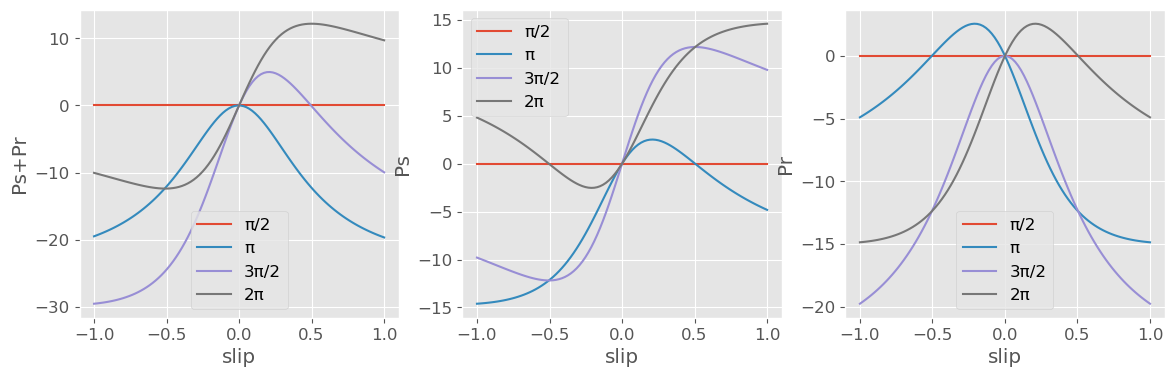

In [690]:
from html.entities import entitydefs
s = -0.072 
slip = np.linspace(-1,1,100)
v_r = 1
# vr_ang = 2*pi#pi/2 + 0.2*(pi/2)
aug_var = [pi/2, 1*pi, 3*pi/2, 2*pi]
for vr_ang in aug_var:
    P_g = []
    P_s = []
    P_r = []
    for ii in slip:
        v1,v2,i2,i1,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, ii, v_r, vr_ang)
        P_g.append(Ps+Pr)
        P_s.append(Ps)
        P_r.append(Pr)
    plt.figure(1, figsize = (14,4))
    plt.subplot(1,3,1)
    plt.plot(slip, P_g)
    plt.legend([entitydefs['pi']+str('/2'), entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Ps+Pr')
    plt.subplot(1,3,2)
    plt.plot(slip, P_s)
    plt.legend([entitydefs['pi']+str('/2'), entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Ps')
    plt.subplot(1,3,3)
    plt.plot(slip, P_r)
    plt.legend([entitydefs['pi']+str('/2'), entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Pr')
x = [-1, 1]             
y = [-0.5, -0.5]        
#plt.plot(x, y, color='blue', linewidth=2)

<font face="Time new roman" size = 4> 
This simulation result demostrates my assuming, under the same rotor voltage amplitude, the different rotor voltage phase can genreate different power rate under differet slip.

We also need notice that when the angle is $\frac{\pi}{2}$ the power generated by rotor and stator are both zeros 
but I don't understand why they are not zero when angle is $\frac{3\pi}{2}$
I try to find the reason later

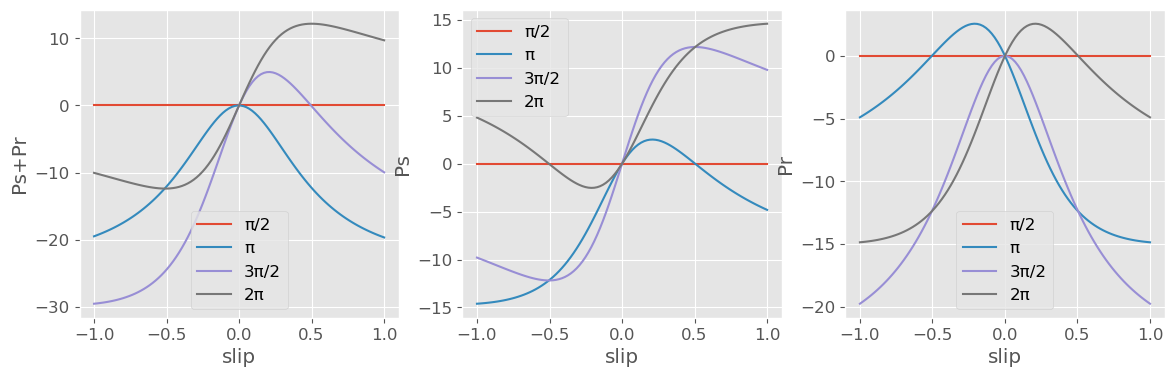

In [691]:
from html.entities import entitydefs
slip = np.linspace(-1,1,100)
v_r = 1
# vr_ang = 2*pi#pi/2 + 0.2*(pi/2)
aug_var = [pi/2, 1*pi, 3*pi/2, 2*pi]
for vr_ang in aug_var:
    P_g = []
    P_s = []
    P_r = []
    for ii in slip:
        v1,v2,i2,i1,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, ii, v_r, vr_ang)
        P_g.append(Ps+Pr)
        P_s.append(Ps)
        P_r.append(Pr)
    plt.figure(1, figsize = (14,4))
    plt.subplot(1,3,1)
    plt.plot(slip, P_g)
    plt.legend([entitydefs['pi']+str('/2'), entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Ps+Pr')
    plt.subplot(1,3,2)
    plt.plot(slip, P_s)
    plt.legend([entitydefs['pi']+str('/2'), entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Ps')
    plt.subplot(1,3,3)
    plt.plot(slip, P_r)
    plt.legend([entitydefs['pi']+str('/2'), entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Pr')
x = [-1, 1]             
y = [-0.5, -0.5]        
#plt.plot(x, y, color='blue', linewidth=2)

In [692]:
#For machine given above
ss = np.arange(-1.0,1.0,0.001)
v_r = 1.1
#rang = np.arange(0,2*pi,0.01)
rang = 2*pi
sx = -0.3
irs = np.zeros(len(ss), dtype = complex)
iss = np.zeros(len(ss), dtype = complex)
Pss = np.zeros(len(ss))
Prs = np.zeros(len(ss))
for ii,sn in enumerate(ss):
    v1,v2,i_r,i_s,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, sn, v_r, rang)
    irs[ii] = i_r
    iss[ii] = i_s
    Sss = Ss
    Pss[ii] = Ps
    Srs = Sr
    Prs[ii] = Pr

/Users/shipingguo/anaconda3/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


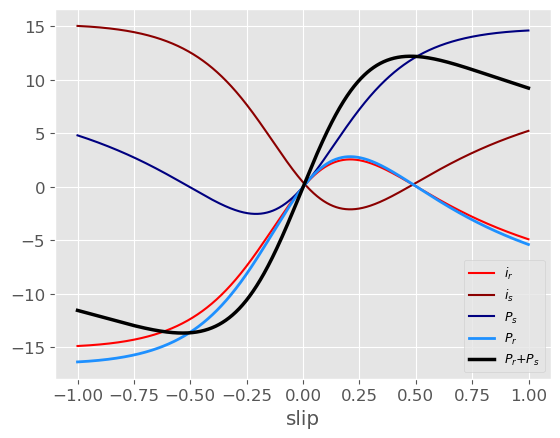

In [693]:
#plt.figure(212, figsize = (4,5))
plt.rc('font', size =12)
plt.plot(ss,irs,c = 'r', lw =1.5, label =r"$i_{r}$")
# plt.plot(ss,np.angle(irs),c = 'darkred', lw =1.5, label =r"$i_{r}$angle")
plt.plot(ss,iss,c = 'darkred', lw =1.5, label =r"$i_{s}$")
plt.plot(ss,Pss,c = 'navy', lw =1.5, label =r"$P_{s}$")
plt.plot(ss,Prs,c = 'dodgerblue', lw =2, label =r"$P_{r}$")
plt.plot(ss,Prs+Pss,c = 'black', lw =2.5, label =r"$P_{r}$+$P_{s}$")
plt.legend(loc = 'lower right', fontsize = 9)
plt.xlabel('slip')

plt.show()

In [694]:
#For machine given above
#ss = np.arange(-1.0,1.0,0.001)
ss = -0.1
v_r = 1.1
rang = np.arange(0, 2*pi, 0.01)
#rang = 2*pi
sx = -0.3
irs = np.zeros(len(rang), dtype = complex)
iss = np.zeros(len(rang), dtype = complex)
Pss = np.zeros(len(rang))
Prs = np.zeros(len(rang))
for ii,ang_var in enumerate(rang):
    v1,v2,i_r,i_s,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, ss, v_r, ang_var)
    irs[ii] = i_r
    iss[ii] = i_s
    Sss = Ss
    Pss[ii] = Ps
    Srs = Sr
    Prs[ii] = Pr

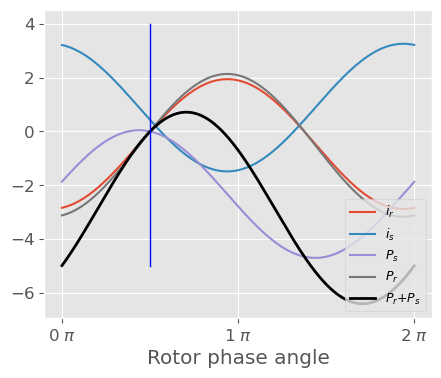

In [695]:
#plt.figure(212, figsize = (4,5))
f,ax=plt.subplots(figsize=(5,4))
xx = rang
plt.rc('font', size = 12)
ax.plot(rang/np.pi, irs, lw =1.5, label =r"$i_{r}$")
ax.plot(rang/np.pi, iss, lw =1.5, label =r"$i_{s}$")
ax.plot(rang/np.pi, Pss, lw =1.5, label =r"$P_{s}$")
ax.plot(rang/np.pi, Prs, lw =1.5,label =r"$P_{r}$")
ax.plot(rang/np.pi, Prs+Pss, c = 'black', lw = 2,label =r"$P_{r}$+$P_{s}$")

x = [0.5, 0.5]             
y = [4, -5]        
plt.plot(x, y, color='blue', linewidth=1)
ax.xaxis.set_major_formatter(tck.FormatStrFormatter('%g $\pi$'))
ax.xaxis.set_major_locator(tck.MultipleLocator(base=1.0))
plt.legend(loc = 'lower right', fontsize = 9)
plt.xlabel('Rotor phase angle')
plt.show()

<font face="Time new roman" size = 4> 
In this figrue, we can clearly see the relationship between rotor voltage phase with power generated and current.

We can also notice the $P_s$ and $P_r$ are zero when phase is $\frac{\pi}{2}$

Besides, the ir and pr are alomost overlap with each other. When vr = 1 they will overlap.

Later I will draw again in the next chapter.

##  <font face="Time new roman" size = 5>3.2 Various Condition analysis

In [696]:
def conditions_DFIM(mach_dict, sx, ws, vs, ird, irq):

    rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_dict) #get parameters
    #------------------------
    zr = complex(rr,sx*ws*sig*lr)
    sp = rr/(ws*(lsigss + lsigrr))
    isq =  vs/(complex(0,ws*ls))
    irn = complex(ird,irq)
    isd = isq - lh*irn/ls
    vrx = zr*irn + complex(0,1)*sx*ws*lh*isd
    vro = vrx/sx
    #------------------------
    #stator power 
    Ss = vs*np.conj(isd)
    Ssc = np.conj(Ss)
    Ps = Ss.real
    Sr = vrx*np.conj(irn)
    Src = np.conj(Sr)
    print(Src.real)
    Pr = Sr.real
    Qr = Sr.imag
    Sro= vro*np.conj(irn)
    return zr, vrx, vro, irn, isq, isd, Ps, Ss, Pr, Qr, Sro


In [697]:
def print_iv(zr, vro, vrx,isq, isd, irn):
    print("Rotor impedence = {0:3.2f}".format(zr))
    print("RotorVoltage  = {0:3.2f}".format(vro))
    print("RotorVoltage on system = {0:3.2f}".format(vrx))
    print('no load stator currentr is = {0:3.2f}'.format(isq))
    print('is = {0:3.2f}'.format(isd))
    print('ir = {0:3.2f}'.format(irn))
    plt.rc('font', size = 12)
    plt.arrow(0,0,0,1, fc ='darkred', ec ='darkred', head_width = 0.05, lw = 1, length_includes_head = False, label='Vs')
    plt.text( 0, 1,'Vs')
    plt.arrow(0,0,isd.real,isd.imag, fc ='magenta', ec ='magenta', head_width = 0.05, lw = 1, length_includes_head =  False)
    plt.text( isd.real, isd.imag, 'isd')
    plt.arrow(0,0,isq.real,isq.imag, fc ='navy', ec ='navy', head_width = 0.05, lw = 1, length_includes_head =  False)
    plt.text( isq.real, isq.imag, 'isq')
    plt.arrow(0,0,vrx.real,vrx.imag, fc ='r', ec ='r',head_width = 0.05, lw = 1, length_includes_head = False)
    plt.text( vrx.real, vrx.imag, 'vr')
    plt.arrow(0,0,irn.real,irn.imag, fc ='darkgreen', ec ='darkgreen',head_width = 0.05, lw = 1, length_includes_head = False)
    plt.text( irn.real, irn.imag, 'ir')
    plt.xlim(-1.1,1.1)
    plt.ylim(-1.1,1.1)
    

In [698]:
def print_power(Ps, Ss, Pr, Qr, Sro):
    #------------------------------------------------------
    print("Ps = {0:3.2f}".format(Ps))
    print("Qs= {0:3.2f}".format(Ss.imag))
    print("Pr = {0:3.4f}".format(Pr))
    print("Qr = {0:3.2f}".format(Qr))
    #----------------------------------------------------------------------
    #print("Real raw power given by  rotor terminal = {0:3.4f}".format(Sro.real))
    #print("Reactive raw power given by   rotor terminal = {0:3.2f}".format(Sro.imag))

-0.0001744680851063829
Rotor impedence = 0.04+0.00j
RotorVoltage  = -0.62-0.73j
RotorVoltage on system = -0.03-0.04j
no load stator currentr is = 0.43+0.00j
is = -0.16+0.49j
ir = 0.60-0.50j
Ps = 0.49
Qs= -0.16
Pr = -0.0002
Qr = -0.04


<Figure size 200x200 with 0 Axes>

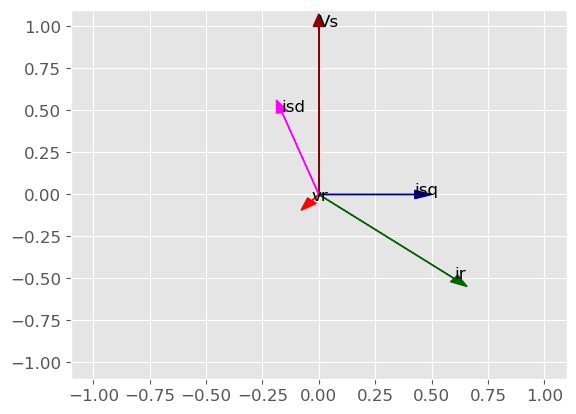

<Figure size 200x200 with 0 Axes>

In [699]:
#Condition 
"""Machine operate like geneartor"""
rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_ma)
sx = 0.05
vs = complex(0,1.0)
ird =  0.6
irq = -0.5
ws = 1.0
zr, vrx, vro, irn, isq, isd, Ps, Ss, Pr, Qr, Sro = conditions_DFIM(mach_ma, sx, ws, vs, ird, irq)
print_iv(zr, vro, vrx,isq,isd, irn)
print_power(Ps, Ss, Pr, Qr, Sro)
plt.figure(101,figsize = (2,2))

<font face="Time new roman" size = 4> 
Ps = 0.49
Qs= -0.16
Pr = -0.0002
Qr = -0.04

Ps > 0, Ps provide to mechanical power, Pr Qr absord mechanical power.
This one work like a motor, convert the electronic power to mechanical power.


0.04897446808510639
Rotor impedence = 0.04-0.00j
RotorVoltage  = -1.58+0.07j
RotorVoltage on system = 0.08-0.00j
no load stator currentr is = 0.43+0.00j
is = -0.16+0.49j
ir = 0.60-0.50j
Ps = 0.49
Qs= -0.16
Pr = 0.0490
Qr = 0.04


<Figure size 200x200 with 0 Axes>

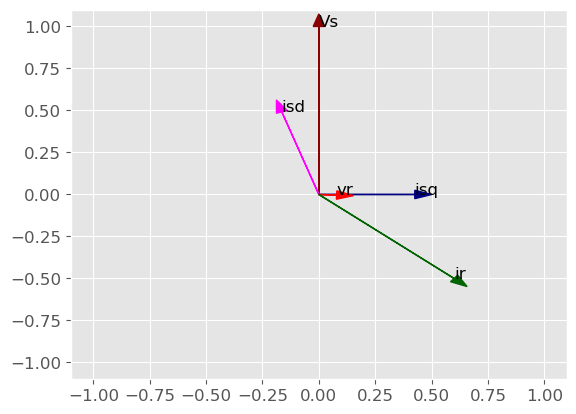

<Figure size 200x200 with 0 Axes>

In [700]:
sx = - 0.05
zr, vrx, vro, irn, isq, isd, Ps, Ss, Pr, Qr, Sro = conditions_DFIM(mach_ma, sx, ws, vs, ird, irq)
print_iv(zr, vro, vrx,isq,isd, irn)
print_power(Ps, Ss, Pr, Qr, Sro)
plt.figure(101,figsize = (2,2))

<font face="Time new roman" size = 4> 
Ps = 0.49
Qs= -0.16
Pr = 0.0490
Qr = 0.04

This one Ps and Pr are both providing mechancial power, so it also works like a motor.
Consuming electrocity power.

-0.014174468085106385
Rotor impedence = 0.04+0.00j
RotorVoltage  = -1.02+0.36j
RotorVoltage on system = -0.05+0.02j
no load stator currentr is = 0.43+0.00j
is = 0.33+0.49j
ir = 0.10-0.50j
Ps = 0.49
Qs= 0.33
Pr = -0.0142
Qr = -0.02


<Figure size 200x200 with 0 Axes>

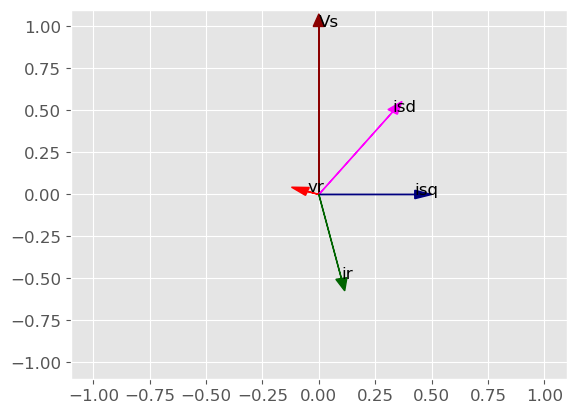

<Figure size 200x200 with 0 Axes>

In [701]:
rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_ma)
sx = 0.05
vs = complex(0,1.0)
ird =  0.1
irq = -0.5
ws = 1.0
zr, vrx, vro, irn, isq, isd, Ps, Ss, Pr, Qr, Sro = conditions_DFIM(mach_ma, sx, ws, vs, ird, irq)
print_iv(zr, vro, vrx,isq,isd, irn)
print_power(Ps, Ss, Pr, Qr, Sro)
plt.figure(101,figsize = (2,2))

<font face="Time new roman" size = 4> 
Ps = 0.49
Qs= 0.33
Pr = -0.0142
Qr = -0.02
Ps Qs bigger than 0, Pr Qr smaller than 0. This condition also work as motor.
Ps providing mechiancial power and Pr extract mechancial power. So it works like motor

0.03497446808510638
Rotor impedence = 0.04-0.00j
RotorVoltage  = -1.02+1.60j
RotorVoltage on system = 0.05-0.08j
no load stator currentr is = 0.43+0.00j
is = 0.52+0.49j
ir = -0.10-0.50j
Ps = 0.49
Qs= 0.52
Pr = 0.0350
Qr = 0.03


<Figure size 200x200 with 0 Axes>

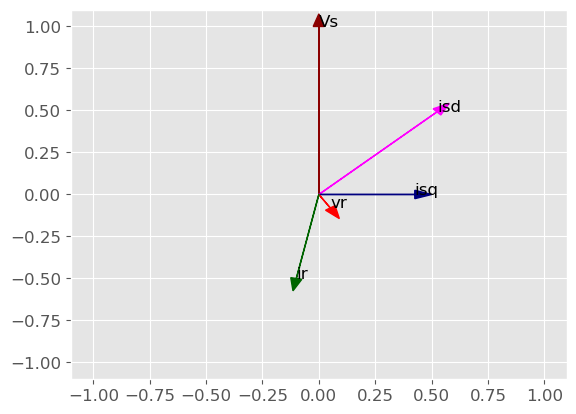

<Figure size 200x200 with 0 Axes>

In [702]:
rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_ma)
sx = -0.05
vs = complex(0,1.0)
ird = -0.1
irq = -0.5
ws = 1.0
zr, vrx, vro, irn, isq, isd, Ps, Ss, Pr, Qr, Sro = conditions_DFIM(mach_ma, sx, ws, vs, ird, irq)
print_iv(zr, vro, vrx,isq,isd, irn)
print_power(Ps, Ss, Pr, Qr, Sro)
plt.figure(101,figsize = (2,2))

<font face="Time new roman" size = 4> 
Ps = 0.49
Qs= 0.52
Pr = 0.0350
Qr = 0.03

All of them are bigger than 0, so all of them are consuming grid power and generating mechancial power.

So it also works like rotor.

-0.014174468085106378
Rotor impedence = 0.04-0.00j
RotorVoltage  = 1.18+0.80j
RotorVoltage on system = -0.06-0.04j
no load stator currentr is = 0.43+0.00j
is = 0.52-0.49j
ir = -0.10+0.50j
Ps = -0.49
Qs= 0.52
Pr = -0.0142
Qr = 0.03


<Figure size 200x200 with 0 Axes>

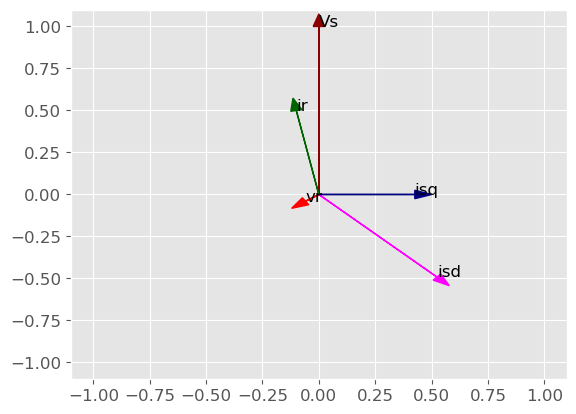

<Figure size 200x200 with 0 Axes>

In [703]:
rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_ma)
sx = -0.05
vs = complex(0,1.0)
ird = -0.1
irq = 0.5
ws = 1.0
zr, vrx, vro, irn, isq, isd, Ps, Ss, Pr, Qr, Sro = conditions_DFIM(mach_ma, sx, ws, vs, ird, irq)
print_iv(zr, vro, vrx,isq,isd, irn)
print_power(Ps, Ss, Pr, Qr, Sro)
plt.figure(101,figsize = (2,2))

<font face="Time new roman" size = 4> 
Ps = -0.49
Qs= 0.52
Pr = -0.0142
Qr = 0.03

This one Ps and Pr are smaller than 0, they are converting mechancial power to electrocity power and work like a generator.

0.03497446808510638
Rotor impedence = 0.04+0.00j
RotorVoltage  = 1.02+1.60j
RotorVoltage on system = 0.05+0.08j
no load stator currentr is = 0.43+0.00j
is = 0.52-0.49j
ir = -0.10+0.50j
Ps = -0.49
Qs= 0.52
Pr = 0.0350
Qr = -0.03


<Figure size 200x200 with 0 Axes>

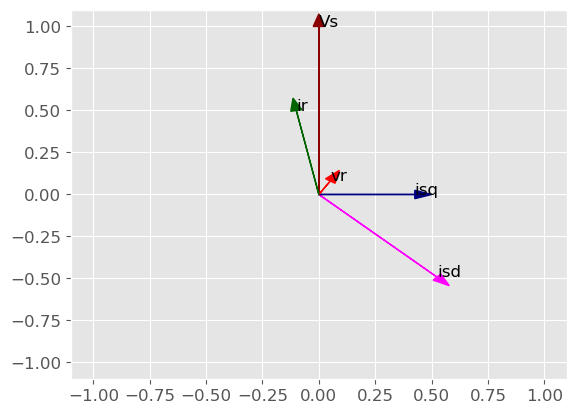

<Figure size 200x200 with 0 Axes>

In [704]:
#Condition 
"""Machine operate like geneartor"""
rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_ma)
sx = 0.05
vs = complex(0,1.0)
ird = -0.1
irq = 0.5
ws = 1.0
zr, vrx, vro, irn, isq, isd, Ps, Ss, Pr, Qr, Sro = conditions_DFIM(mach_ma, sx, ws, vs, ird, irq)
print_iv(zr, vro, vrx,isq,isd, irn)
print_power(Ps, Ss, Pr, Qr, Sro)
plt.figure(101,figsize = (2,2))

<font face="Time new roman" size = 4> 
Ps = -0.49
Qs= 0.52
Pr = 0.0350
Qr = -0.03

This one Ps < 0, Pr is bigger than 0 and smaller than absolute Ps. so now it works like generator. The rotor maybe barking.

-0.004574468085106385
Rotor impedence = 0.04-0.00j
RotorVoltage  = 0.70-0.51j
RotorVoltage on system = -0.03+0.03j
no load stator currentr is = 0.43+0.00j
is = -0.07-0.49j
ir = 0.50+0.50j
Ps = -0.49
Qs= -0.07
Pr = -0.0046
Qr = 0.03


<Figure size 200x200 with 0 Axes>

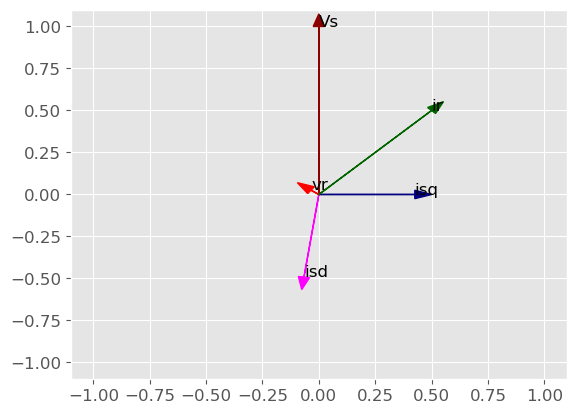

<Figure size 200x200 with 0 Axes>

In [705]:
rs,rr,lh,ls,lr,sig,lsigss,lsigrr = mach_Tpara(mach_ma)
sx = -0.05
vs = complex(0,1.0)
ird = 0.5
irq = 0.5
ws = 1.0
zr, vrx, vro, irn, isq, isd, Ps, Ss, Pr, Qr, Sro = conditions_DFIM(mach_ma, sx, ws, vs, ird, irq)
print_iv(zr, vro, vrx,isq,isd, irn)
print_power(Ps, Ss, Pr, Qr, Sro)
plt.figure(101,figsize = (2,2))

<font face="Time new roman" size = 4> 
Ps = -0.49
Qs= -0.07
Pr = -0.0046
Qr = 0.03

Ps Qs and Pr are both less than 0, they are generating power.
This condition works like the generator.

#### There are many other conditions, because of the time limited I just do the simulation above.

# <font face="Time new roman" size = 6>4. Answer the questions

<font face="Time new roman" size = 4>
5. What would be the rotor current if the power delivered to the grid is -0.5 p.u ? 

6. Draw the curve of rotor current magnitude when the slip is varied between pull-out slip to zero slip
7. What is the power factor at the stator and the power factor at rotor end connected to grid (assuming only sinusoidal quantities)? 
[An AC/DC converter connected to grid feeds a DC link, a DC to AC converter is connected to DC bus. The AC end of DC to AC converter is connected to the rotor terminals to provide $\vec
{v}_r$]
8. Draw the curve of rotor power as the slip changes
9. *Bonus Points* Draw the curve for change in rotor current and rotor power if the rotor voltage magnitude is changes with respect to stator voltage (which is fixed at grid voltage) 

##  <font face="Time new roman" size = 5>4.1 Calculate generated power = -0.5p.u

<font face="Time new roman" size = 4> The wrong way to calculate:
In the beginning I think I can directly change the vr to find the -0.5 p.u point. 

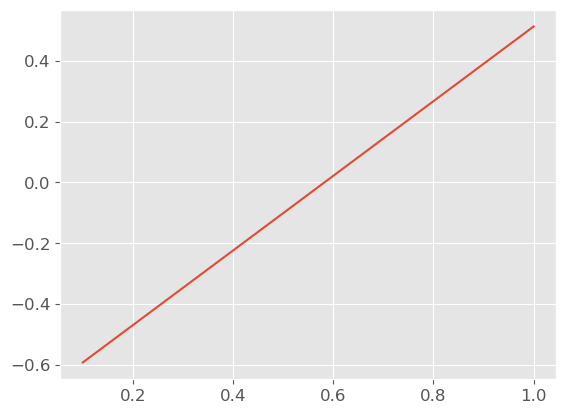

In [706]:
s = -0.2
v_r = np.linspace(0.1,1,10)
P_g = []
vr_ang = pi/2 + 0.2*(pi/2)
for ii in v_r:
    v1,v2,i2,i1,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, s, ii, vr_ang)
    P_g.append(Ps+Pr)
plt.plot(v_r, P_g)

<font face="Time new roman" size = 4> 
The power generated has a linear realationship with rotor voltage

I want to keep the sliding rate unchanged and change the rotor voltage to see which voltage will produce a -0.5 output power
But I suddenly realized that this is a steady-state model, and if you change the voltage, it's not a steady-state model
So what should I change is sliding

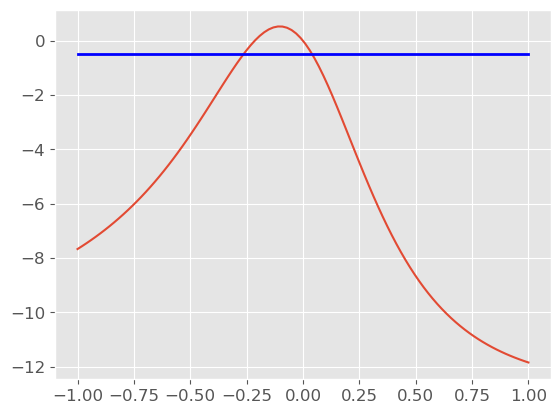

In [707]:
s = -0.072 
slip = np.linspace(-1,1,100)
v_r = 1
vr_ang = pi/2 + 0.5*(pi/2)
P_g = []
for ii in slip:
    v1,v2,i2,i1,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, ii, v_r, vr_ang)
    P_g.append(Ps+Pr)
plt.plot(slip, P_g)
x = [-1, 1]             # x坐标，表示横线的起点和终点
y = [-0.5, -0.5]        # y坐标，表示横线的高度（在y=0的位置）
plt.plot(x, y, color='blue', linewidth=2)

<font face="Time new roman" size = 4>  The crossing points are the cooresponding slips we need.

##  <font face="Time new roman" size = 5>4.2 Draw the curve of rotor current magnitude when the slip is varied between pull-out slip to zero slip

<font face="Time new roman" size = 4>
I already done this in last chapter, but there are many avaiables can be changed. 

I just simulate one condition below.

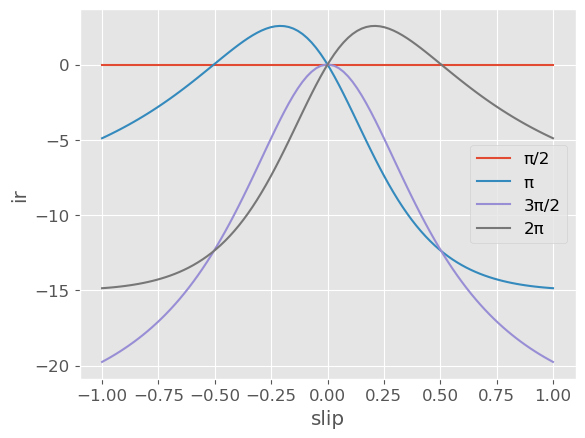

In [708]:
from html.entities import entitydefs
slip = np.linspace(-1,1,100)
v_r = 1
# vr_ang = 2*pi#pi/2 + 0.2*(pi/2)
aug_var = [pi/2, 1*pi, 3*pi/2, 2*pi]
for vr_ang in aug_var:
    i_r = []
    for ii in slip:
        v1,v2,i2,i1,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, ii, v_r, vr_ang)
        i_r.append(i2)
    plt.plot(slip, i_r)
    plt.legend([entitydefs['pi']+str('/2'), entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('ir')

x = [-1, 1]             
y = [-0.5, -0.5]        
#plt.plot(x, y, color='blue', linewidth=2)

##  <font face="Time new roman" size = 5>4.3 Draw the curve of rotor power as the slip changes</font> 

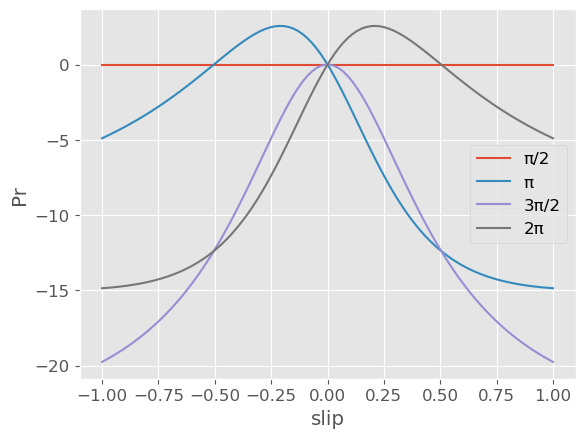

In [709]:
from html.entities import entitydefs
slip = np.linspace(-1,1,100)
v_r = 1
# vr_ang = 2*pi#pi/2 + 0.2*(pi/2)
aug_var = [pi/2, 1*pi, 3*pi/2, 2*pi]
for vr_ang in aug_var:
    P_r = []
    for ii in slip:
        v1,v2,i2,i1,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, ii, v_r, vr_ang)
        P_r.append(Pr)
    plt.plot(slip, P_r)
    plt.legend([entitydefs['pi']+str('/2'), entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Pr')
x = [-1, 1]             
y = [-0.5, -0.5]        
#plt.plot(x, y, color='blue', linewidth=2)

<font face="Time new roman" size = 4>
The result almost the same with the rotor current when vr = 1. It's the same conclusion as we got from last chapter

It's reasonable, the Pr = vr * ir

## <font face="Time new roman" size = 5 align=center>4.4 What is the power factor at the stator and the power factor at rotor end connected to grid</font> 

<font face="Time new roman" size = 4> All the Power Variations with slip

In [710]:
ss = np.arange(-1.0,1.0,0.001)
rang0 = pi/10
rang = np.arange(0,2*pi,0.01)
sx = -0.3
irs = np.zeros(len(ss), dtype = complex)
iss = np.zeros(len(ss), dtype = complex)
Pss = np.zeros(len(ss))
Prs = np.zeros(len(ss))
for ii,sn in enumerate(ss):
    vs = complex(0,1.0)
    ws = 1.0
    vrrx = cmath.rect(sn*(lh/ls),rangn)/sn
    zr = complex(rr/sn,ws*sig*lr)
    irs[ii] = (vrrx - vs*lh/ls)/zr
    iss[ii] = vs/complex(0,ws*ls) - lh*irs[ii]/ls
    #stator power 
    Sss = np.conj(vs)*iss[ii]
    Pss[ii] = Sss.real
    Srs = np.conj(vrrx)*irs[ii]
    Prs[ii] = Srs.real

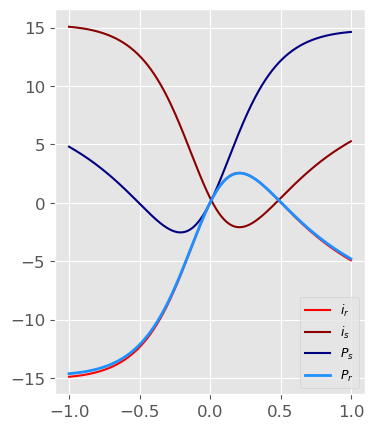

In [711]:
plt.figure(212, figsize = (4,5))
plt.rc('font', size =12)
plt.plot(ss,irs,c = 'r', lw =1.5, label =r"$i_{r}$")
# plt.plot(ss,np.angle(irs),c = 'darkred', lw =1.5, label =r"$i_{r}$angle")
plt.plot(ss,iss,c = 'darkred', lw =1.5, label =r"$i_{s}$")
plt.plot(ss,Pss,c = 'navy', lw =1.5, label =r"$P_{s}$")
plt.plot(ss,Prs,c = 'dodgerblue', lw =2, label =r"$P_{r}$")
plt.legend(loc = 'lower right', fontsize = 9)
plt.show()

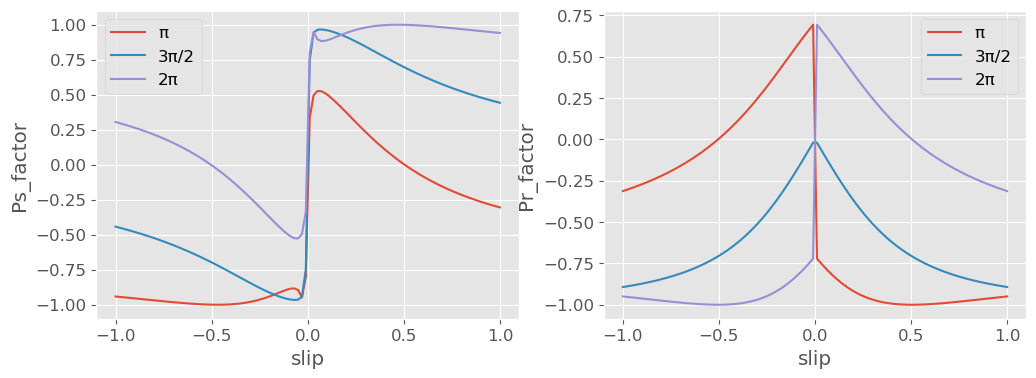

In [712]:
from html.entities import entitydefs
slip = np.linspace(-1,1,100)
v_r = 1
# vr_ang = 2*pi#pi/2 + 0.2*(pi/2)
aug_var = [1*pi, 3*pi/2, 2*pi]
for vr_ang in aug_var:
    Ps_factor = []
    Pr_factor = []
    for ii in slip:
        v1,v2,i2,i1,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, ii, v_r, vr_ang)
        Ps_factor.append(Ps/(np.abs(Ss)))
        Pr_factor.append(Pr/(np.abs(Sr)))
    plt.figure(1, figsize = (12,4))
    plt.subplot(1,2,1)
    plt.plot(slip, Ps_factor)
    plt.legend([ entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Ps_factor')
    plt.subplot(1,2,2)
    plt.plot(slip, Pr_factor)
    plt.legend([ entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Pr_factor')

x = [-1, 1]             
y = [-0.5, -0.5]        
#plt.plot(x, y, color='blue', linewidth=2)

 <font face="Time new roman" size = 5 align=center>4.5 Draw the curve for change in rotor current and rotor power</font> 


<font face="Time new roman" size = 4> *Bonus Points* Draw the curve for change in rotor current and rotor power if the rotor voltage magnitude is changes with respect to stator voltage (which is fixed at grid voltage) 

In [713]:
ss = np.arange(-1.0,1.0,0.001)
vrmag = 1.1
vrx = np.arange(0, 1.1, 0.2)
rang = np.arange(0,2*pi,0.01)
sx = -0.05
ira = np.zeros((len(rang),len(vrx)), dtype = complex)
isa = np.zeros((len(rang),len(vrx)), dtype = complex)
vra = np.zeros((len(rang),len(vrx)), dtype = complex)
Ssa = np.zeros((len(rang),len(vrx)), dtype = complex)
Sra =  np.zeros((len(rang),len(vrx)), dtype = complex)
for vv,vn in enumerate(vrx):
    for ii,rangn in enumerate(rang):
        vs = complex(0,1.0)
        ws = 1.0
        vra[ii,vv] = cmath.rect(vn*sx,rangn)/sx
        zr = complex(rr/sx,ws*sig*lr)
        #------------------------
        ira[ii,vv] = (vra[ii,vv] - vs*lh/ls)/zr
        isa[ii,vv] = vs/complex(0,ws*ls) - lh*ira[ii,vv]/ls
        #------------------------
        #stator power 
        Ssa[ii,vv] = vs*np.conj(isa[ii,vv])
        Sra[ii,vv] = vra[ii,vv]*np.conj(ira[ii,vv])

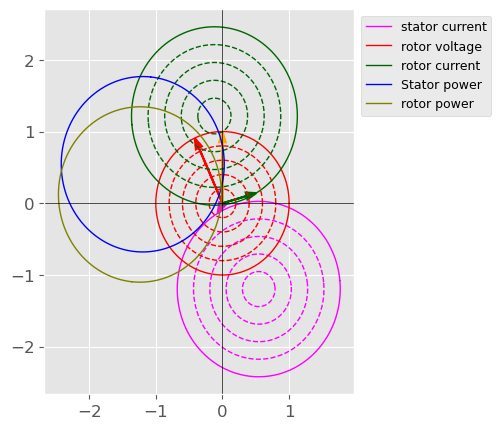

In [714]:
plt.figure(201,figsize = (4,5))
plt.rc('font', size = 12)
plt.arrow(0,0,0,1, fc ='orange', ec ='orange', lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(isa[:,-1].real,isa[:,-1].imag, c ='magenta', lw = 1, label = "stator current")
plt.plot(isa[:,0:-1].real,isa[:,0:-1].imag,ls = "--", c ='magenta', lw = 1)
plt.arrow(0,0,isa[200,-1].real,isa[200,-1].imag, fc ='magenta', ec = 'magenta',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(vra[:,-1].real,vra[:,-1].imag, c ='r', lw = 1, label = 'rotor voltage')
plt.plot(vra[:,0:-1].real,vra[:,0:-1].imag,ls = '--', c ='r', lw = 1)
plt.arrow(0,0,vra[200,-1].real,vra[200,-1].imag, ec ='r', fc = 'r',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(ira[:,-1].real,ira[:,-1].imag, c ='darkgreen',lw = 1, label = "rotor current")
plt.plot(ira[:,0:-1].real,ira[:,0:-1].imag,ls = '--', c ='darkgreen',lw = 1)
plt.arrow(0,0,ira[200,-1].real,ira[200,-1].imag, ec ='darkgreen',fc = 'darkgreen',lw = 1.5, length_includes_head = True, head_width = 0.1)
plt.plot(Ssa[:,-1].real,Ssa[:,-1].imag, c ='blue',lw = 1, label = "Stator power")
plt.plot(Sra[:,-1].real,Sra[:,-1].imag, c ='olive',lw = 1, label = "rotor power")
# plt.xlim(-1.1,1.1)
# plt.ylim(-1.1,1.1)
plt.axhline(0, c = 'k', lw = 0.5)
plt.axvline(0, c = 'k', lw = 0.5)
plt.legend(loc = "upper left", bbox_to_anchor = (1.0,1.0), fontsize = 9)
# plt.savefig(dirfig2 + "DFIGwithvrmagchange.pdf", bbox_inches = 'tight', transparent = True)

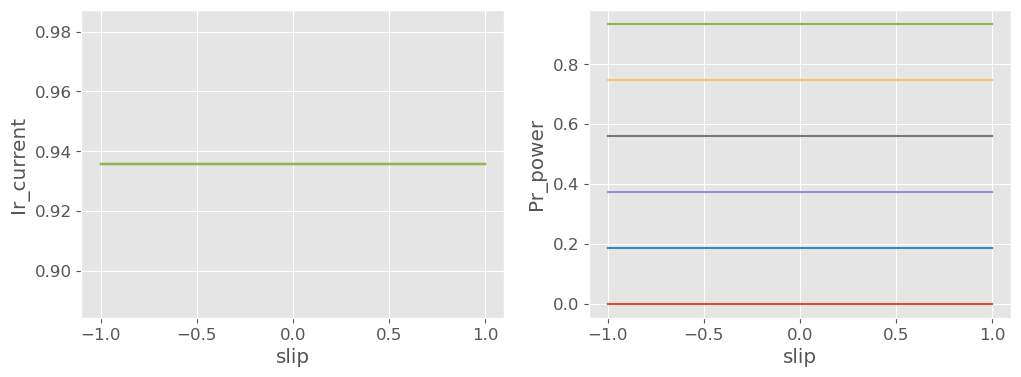

In [715]:
vrx = np.arange(0, 1.1, 0.2)
slip = np.linspace(-1,1,100)
sx = -0.05
vr_ang = pi/2 + 0.5*(pi/2)
aug_var = [1*pi, 3*pi/2, 2*pi]
for vr in vrx:
    Ir_current = []
    Pr_power = []
    for ii in  slip:
        v1,v2,ir,is_,Sr,Ss,Ps,Pr  = ss_DFIG(mach_ma, sx, vr, vr_ang)
        Ir_current.append(np.abs(ir))
        Pr_power.append(np.abs(Sr))
    plt.figure(1, figsize = (12,4))
    plt.subplot(1,2,1)
    plt.plot(slip, Ir_current)
    #plt.legend([ entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Ir_current')
    plt.subplot(1,2,2)
    plt.plot(slip, Pr_power)
    #plt.legend([ entitydefs['pi'], str(3)+entitydefs['pi']+str('/2'), str(2)+entitydefs['pi']])
    plt.xlabel('slip')
    plt.ylabel('Pr_power')

x = [-1, 1]             
y = [-0.5, -0.5]        
#plt.plot(x, y, color='blue', linewidth=2)

<font face="Time new roman" size = 4>
The outcome of my analysis indicates that the rotor current remains constant, while the power exhibits a linear change. This contrasts with the results presented in the provided notebook. 

Upon reviewing the equations, I discovered that rotor current (ir) is not influenced by rotor voltage (vr) but is instead affected by stator voltage (vs). 
Consequently, I think my results maybe accurate.
 

# <font face="Time new roman" size = 6>5. Conclusion

<font face="Time new roman" size = 4> 
This study presented a thorough exploration of the Steady State Model for a Doubly Fed Induction Generator (DFIG) in a Wind Turbine Application. The model, grounded in space vector equations, considered crucial parameters such as stator and rotor resistances, inductances, and the rotor voltage space vector.

The analysis revealed the impact of rotor voltage magnitude on power distribution, emphasizing the need for precise voltage control for optimal performance. The investigation into system behavior under varying conditions provided insights into the dynamic nature of the generator, particularly regarding rotor current sensitivity to slip variations.

The derived expressions for stator and rotor electrical power, coupled with analysis of rotor current and power, contribute to a better understanding of the system. These findings hold significant implications for wind turbine applications, offering valuable insights for optimizing efficiency and stability.

In conclusion, this study advances the understanding of DFIGs, providing a foundation for further research in renewable energy even though there are many other question need further research. The developed model and analyses contribute to the ongoing efforts to enhance the performance of wind turbine systems.